#  Heart Failure Prediction Model:

DSCI Group 43 Members:
- Jellia Ma 
- Hassan Anvery
- Rohan Badini 
- Adyesha Singhdeo

## 1. Introduction: 

Heart failure is a recently heated topic which is caused by the heart’s inability to pump blood efficiently. This can often lead to blood backing up into the lungs, further leading to shortness of breath and many other severe outcomes which might risk people's lives. Heart failure results from other diseases, such as coronary heart disease. A few ways of prevention are through lifestyle changes, such as exercising, reduction of sodium (salt) in the diet, and managing stress (Mayo Clinic).

In this project, we are trying to predict if a patient could have heart failure by looking at different indicators. Using the Kaggle dataset, the following indicators elicit a better prediction for heart failure. Firstly, age, because with maturity, the heart deteriorates and fatigues. Secondly, cholesterol levels, as having high amounts, can lead to artery walls closing up, causing the heart to stress. Maximum heart rate, might casue disfunction of heart if it reaches out of the normal range. Old peak value, as it more drops from the baseline value, the more possible the patient will have heart disease. Finally, blood pressure, as high levels can cause stress on the heart (NIH). More detailed explanation will be depicted below.

**Age** Scientists have determined a relationship between age and heart disease likelihood. Research states that adults over 65 are more likely to suffer from cardiovascular disease. This is because aging can cause changes in the heart and blood vessels, such as stiffening of the heart and blood vessels, which may increase a person's risk of developing cardiovascular disease (Lakatta et al., 2003). Our graph exploring the relationship between age and heart disease, also observed that in older patients, there is a higher count of heart disease occurence than in younger patients.

**Resting BP**: Resting BP (mm Hg) stands for resting blood pressure. Blood pressure measures the force the blood uses to get through the arteries. There exists a positive relationship between resting blood pressure and heart disease. High blood pressure is a significant risk factor for cardiovascular disease (Cleveland Clinic, 2022).

**Cholesterol**: This column measures serum cholesterol in mm/dl. Cholesterol is a fatty lipid that is essential in the process of making hormones and vitamins. However, high cholesterol levels can cause an accumulation of fatty deposits in blood vessels that make it difficult for blood to flow through the arteries. This causes an increase in blood pressure and can increase the risk of heart disease (Kinosian et al., 1994).

**Max HR**: This indicates the maximum heart rate a person can get when he or she is at rest. If the maximum heart rate (maxHR) is too high, it can lead to excessive fatigue of the heart (Sandvik et al., 1995). The maximum heart rate should be using 220 deducting the age.


**Old Peak Value**: This indicator is equivalent to ST depression, a specific outcome where the ST segment is specifically below the baseline of a person’s results that can occur on an individual's ECG (electrocardiograph). Having a depression below the baseline can possibly cause future heart disease. The higher this value, the more extended below the baseline, which means it is more possible to have heart disease (MediLexicon International).


## 2. Methods & Results

Using the heart failure dataset, we would like to use data analysis methods to predict whether a person has heart disease or not. In the dataset of heart_failure, the column of heart disease contains categorical values. "1" refers to heart disease, and "0" to no heart disease. We plan to use the columns of Age, Resting BP, Cholesterol, MaxHR, and old peak value as predictors to predict the classification of the observations as 1 (heart disease) or 0 (no heart disease). 




We planned to build a classification model from this dataset. It will, when given the values for the predictor columns for an individual, try to predict whether the person has heart disease or not. The classification will be displayed via number where **1** means *"The person has heart disease"* and **0** means *"The person does not have heart disease."*

### Preliminary Exploratory Analysis:

- We displayed our data set in a tidy format. 
- We also used training data to be shown in a table and visualzied in a plot.

In [1]:
#inserting the necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Data Reading

In [2]:
heart_data <- read_csv("https://raw.githubusercontent.com/RohanBadini/DSCI-Group-43-Project/main/Datasets/heart_failure.csv")
head(heart_data)

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


### Data Wrangling

We renamed the column names because column names are case sensitive in R. We have also deleted some columns (excercise_angina and st_slope) which will not affect our future comparisons and predictions at all. We deleted them because they were not relevant to our predictions.

In [3]:
#The column names in R should be case sensitive, therefore we have renamed the column names. 
heart_data <- rename(heart_data,
       age = Age, 
       sex = Sex, 
       chestpain_type = ChestPainType,
       resting_bp = RestingBP, 
       cholesterol = Cholesterol, 
       fasting_bs = FastingBS,
       resting_ecg = RestingECG,
       max_hr = MaxHR,
       excercise_angina = ExerciseAngina,
       old_peak = Oldpeak,
       st_slope = ST_Slope,
       heart_disease = HeartDisease) |>
select(-excercise_angina,-st_slope, -chestpain_type, -resting_ecg)

head(heart_data)

age,sex,resting_bp,cholesterol,fasting_bs,max_hr,old_peak,heart_disease
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,M,140,289,0,172,0.0,0
49,F,160,180,0,156,1.0,1
37,M,130,283,0,98,0.0,0
48,F,138,214,0,108,1.5,1
54,M,150,195,0,122,0.0,0
39,M,120,339,0,170,0.0,0


We will be predicting the outcome of whether the person has heart disease or not.                                         
In which,**1** means "Yes, the person has heart disease" and **0** means "No, the person doesn't have heart disease"

Since, we are using 0 and 1 as outcomes. We have converted the values from vector to categorical values.

In [4]:
heart_data <- heart_data |>
mutate(heart_disease = as_factor(heart_disease)) |>
mutate(fasting_bs = as_factor(fasting_bs)) |> 
mutate(sex = as_factor(sex)) 

head(heart_data)

age,sex,resting_bp,cholesterol,fasting_bs,max_hr,old_peak,heart_disease
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
40,M,140,289,0,172,0.0,0
49,F,160,180,0,156,1.0,1
37,M,130,283,0,98,0.0,0
48,F,138,214,0,108,1.5,1
54,M,150,195,0,122,0.0,0
39,M,120,339,0,170,0.0,0


### Exploratory Data Analysis:

**Splitting the dataset into training dataset and testing dataset**

In [5]:
set.seed(999)
#Here, we have splited the data into Training dataset and Testing  dataset
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

In [6]:
head(heart_train)
head(heart_test)

age,sex,resting_bp,cholesterol,fasting_bs,max_hr,old_peak,heart_disease
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
37,M,130,283,0,98,0,0
39,M,120,339,0,170,0,0
45,F,130,237,0,170,0,0
54,M,110,208,0,142,0,0
48,F,120,284,0,120,0,0
37,F,130,211,0,142,0,0


age,sex,resting_bp,cholesterol,fasting_bs,max_hr,old_peak,heart_disease
<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
40,M,140,289,0,172,0.0,0
49,F,160,180,0,156,1.0,1
54,M,150,195,0,122,0.0,0
37,M,140,207,0,130,1.5,1
43,F,120,201,0,165,0.0,0
36,M,120,267,0,160,3.0,1


In [7]:
#Calculating the sex ratio of the overall data
heart_data_analysis <- heart_train |> 
group_by(sex) |>
summarize(n = n())
heart_data_analysis

sex,n
<fct>,<int>
M,544
F,144


Table 2.1: Sex Ratio of the Overall Data

Here, we are creating a model using a training data of 544 males and 144 females. 

In [8]:
heart_data_analysis2 <- heart_train |> 
filter(cholesterol >= 240) |>
group_by(heart_disease)|>
summarize(n = n())

heart_data_analysis2

heart_disease,n
<fct>,<int>
0,129
1,141


Table 2.2: Ratio of People Getting Heart Disease When Cholesterol >= 240

As per the article on "www.hopkinsmedicine.org", cholesterol of 240 mg/dL or more is considered to be high cholesterol levels and people with high cholesterol levels are more likely to have heart failure(John Hopkins Medicine).

We can observe that there are 270 individuals with cholesterol levels of 240 mg/dL or higher in the data. 141 individuals suffer from heart failure in that data. So, it's safe to assume that there's around 50% probability that someone with high cholesterol may eventually develop heart failures.

## Exploring the Relationships Between Variables in the Dataset ##


### Age vs. Heart Disease ###

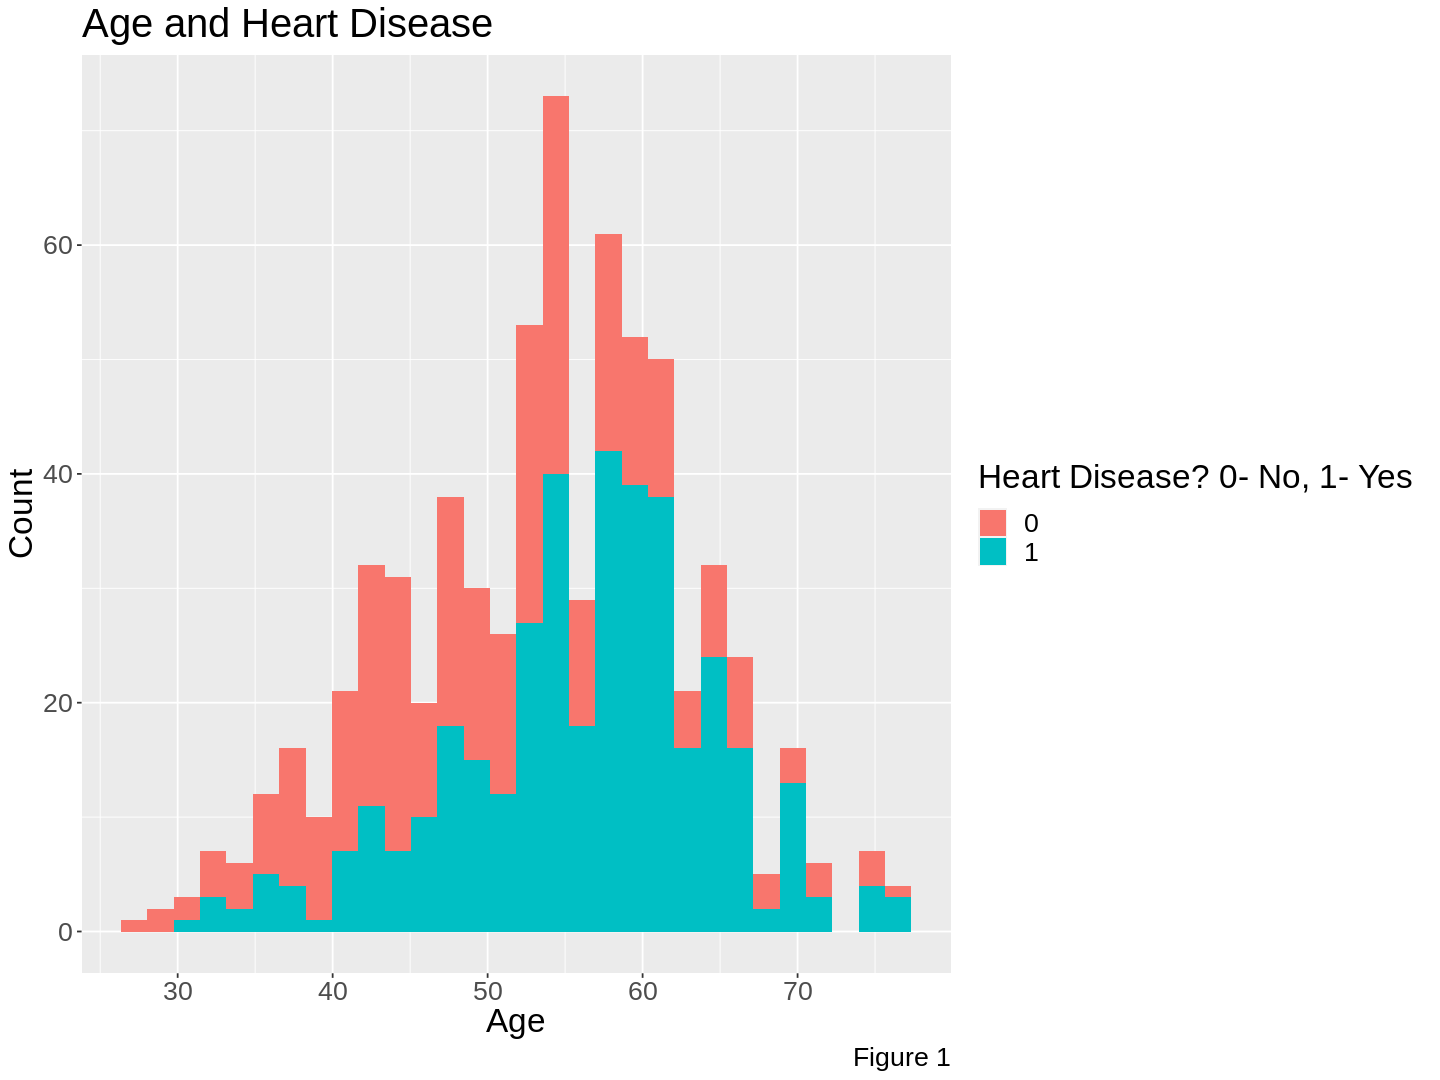

In [9]:
options(repr.plot.width = 12, repr.plot.height = 9)

age_plot <- heart_train |>
    ggplot(aes(x = age, fill = heart_disease)) + 
    geom_histogram(binwidth = 1.7)+
    labs(x = "Age", fill = "Heart Disease? 0- No, 1- Yes " , y = "Count", caption="Figure 1") +
    ggtitle("Age and Heart Disease") +
    theme(text = element_text(size=20))

age_plot

The graph above shows the relationship between age and heart disease. It is clear that at a higher age, there are more counts for heart disease than not. Until the age of 50, there are more counts of individuals with no heart disease. After 50, the individuals are more likely to have heart disease than not. The highest numbers can be seen around age 55. 
It does decline down after that as it can be inferred that people have died after. 

### Age vs. Resting Blood Pressure

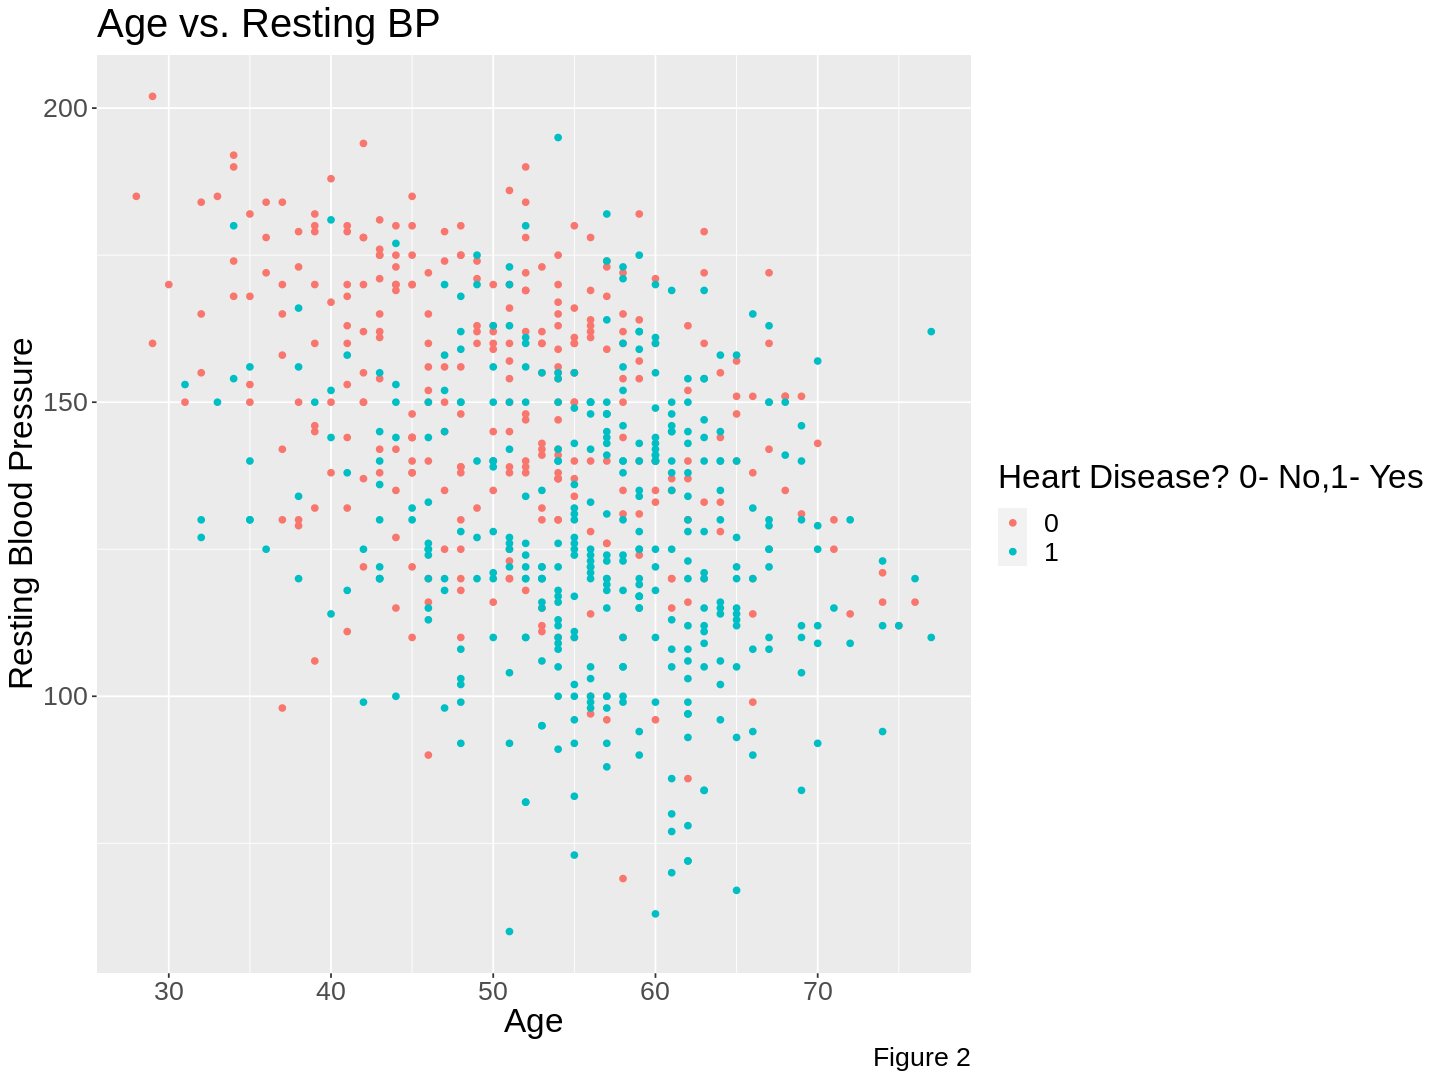

In [10]:
options(repr.plot.width = 12, repr.plot.height = 9)

agevsrestingbp_plot <- heart_train |>
    ggplot(aes( x = age , y = max_hr, colour = heart_disease)) + 
    geom_point() + 
    labs(x = "Age", y = "Resting Blood Pressure", colour= "Heart Disease? 0- No,1- Yes", caption="Figure 2") +
    ggtitle("Age vs. Resting BP") +
    theme(text = element_text(size=20))

agevsrestingbp_plot

The graph above shows the relationship between age and resting BP. We can see that there is a negative correlation between the two variables. A higher resting BP is observed to be more common at a younger age, and older people are likely to have lower resting BP. This is an important comparison as Resting BP refers to the amount of blood being pushed out of the heart. With an increase in age eventual fatigue on the heart increases, and resting BP starts to drop. This increases the likelihood for heart disease. We can see this as most cases of Heart Disease occur at a higher age, when resting BP is lower.

### Age vs. Cholesterol Level ###

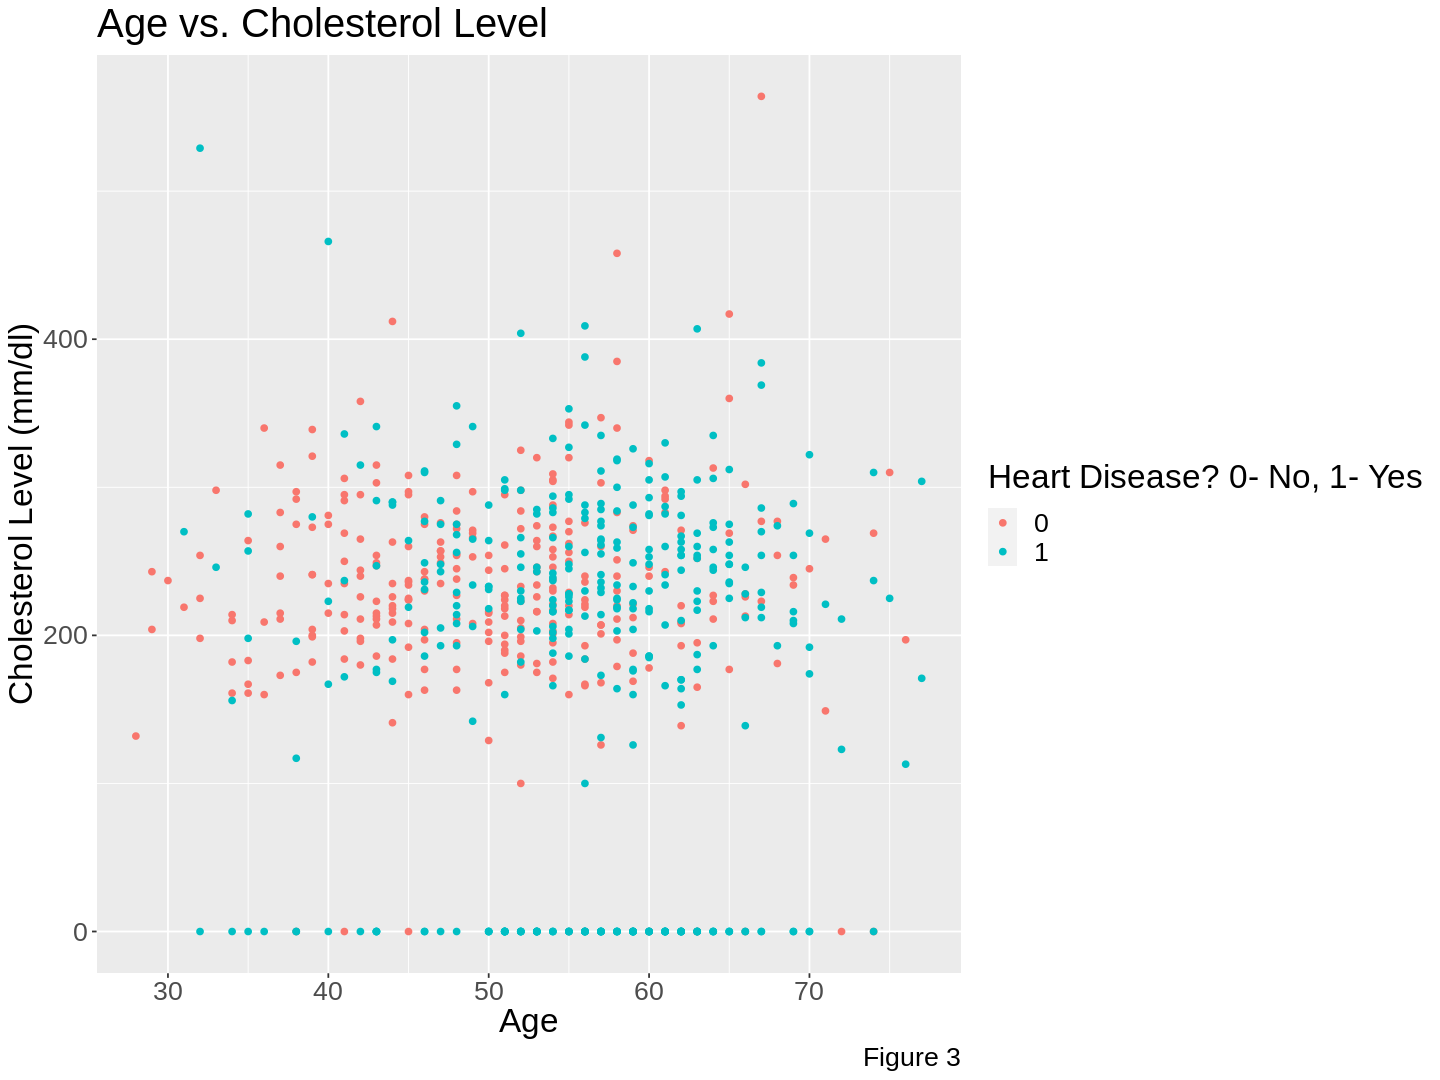

In [11]:
options(repr.plot.width = 12, repr.plot.height = 9)

agevscholesterol_plot <- heart_train |>
    ggplot(aes( x = age, y = cholesterol, colour = heart_disease)) + 
    geom_point() + 
    labs(x = "Age", y = "Cholesterol Level (mm/dl)", colour= "Heart Disease? 0- No, 1- Yes", caption="Figure 3") +
    ggtitle("Age vs. Cholesterol Level") +
    theme(text = element_text(size=20))

agevscholesterol_plot

### Cholesterol Levels vs. Heart Disease ###

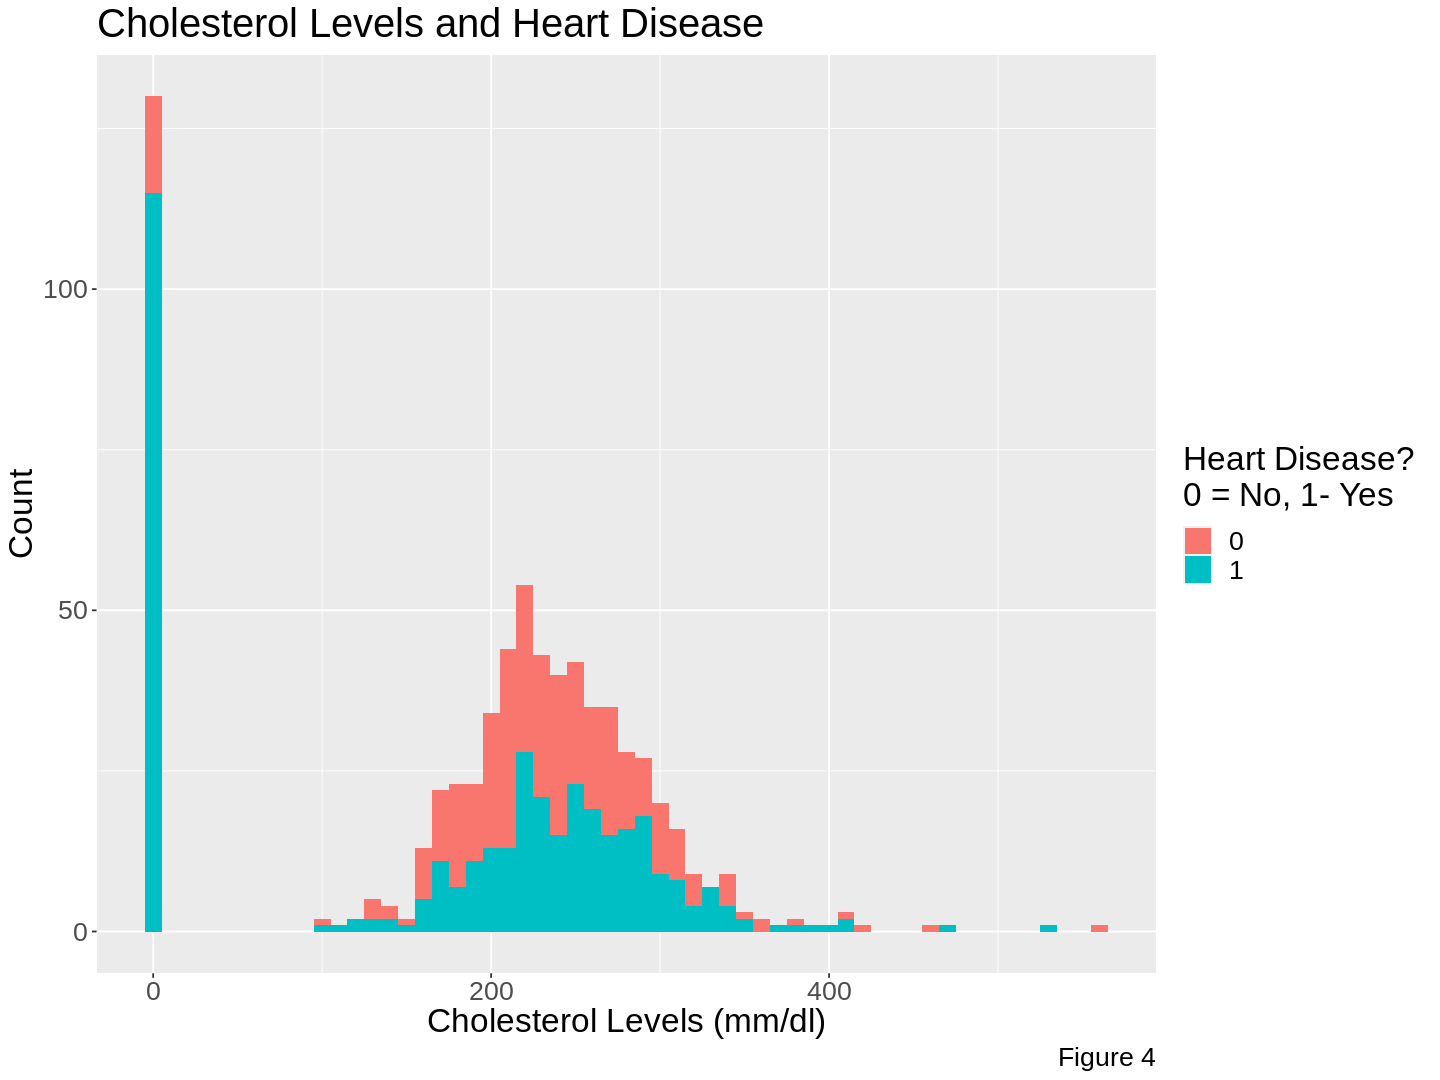

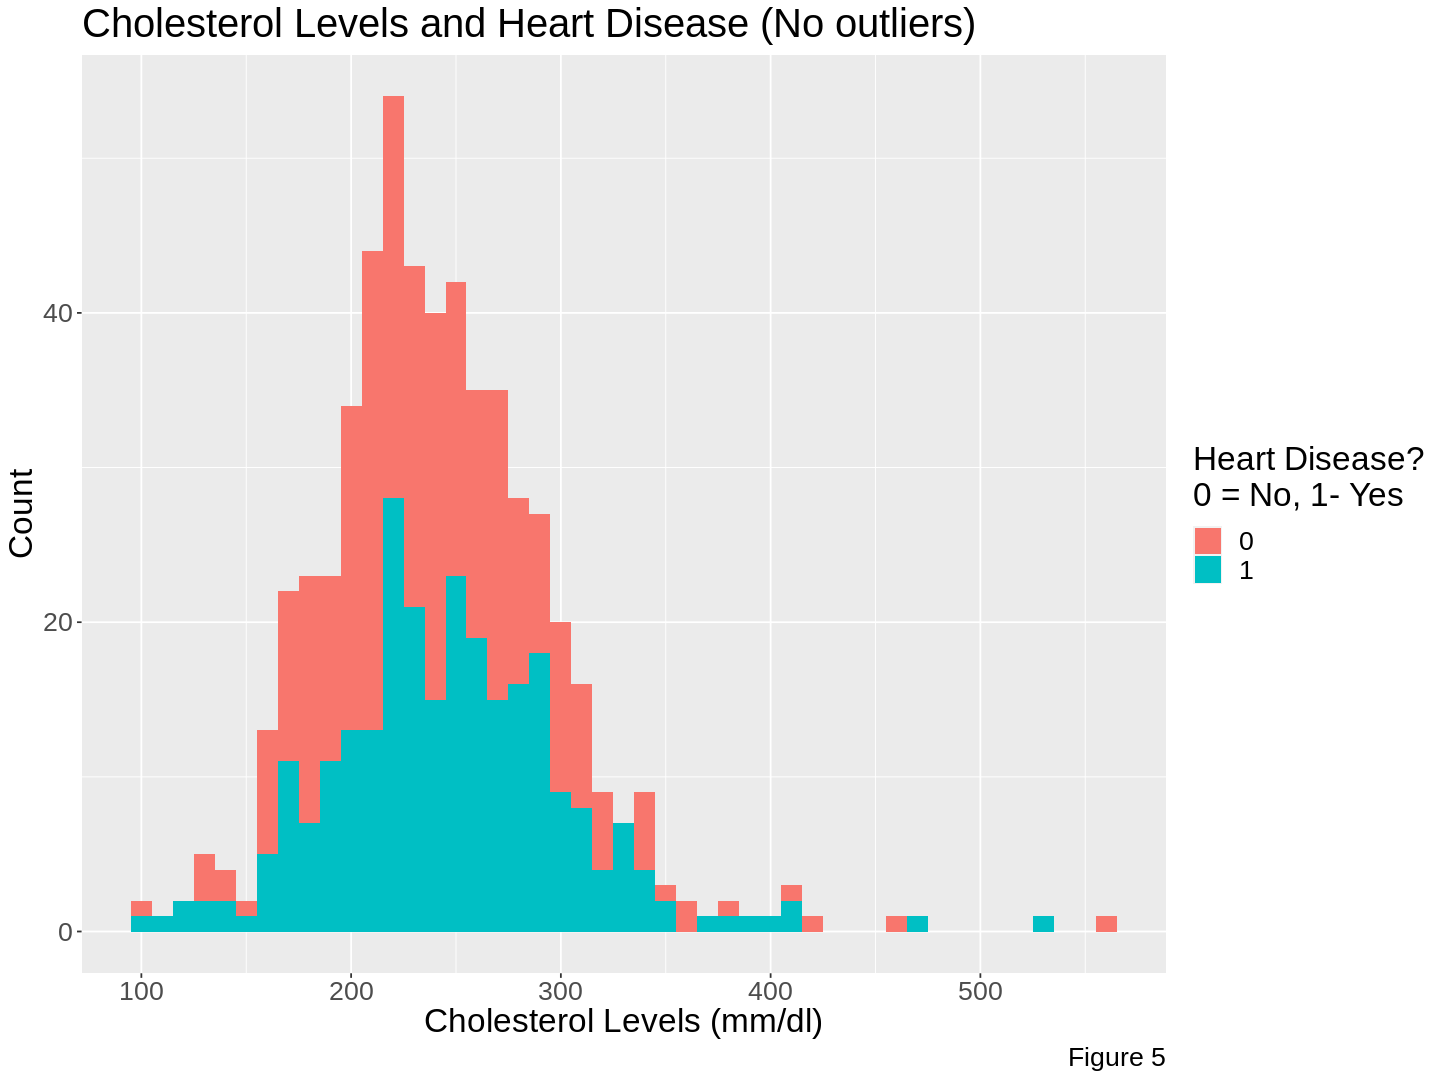

In [12]:
options(repr.plot.width = 12, repr.plot.height = 9)

cholesterol_plot <- heart_train |>
    ggplot(aes(x = cholesterol, fill = heart_disease)) + 
    geom_histogram(binwidth = 10)+
    labs(x = "Cholesterol Levels (mm/dl)", fill = "Heart Disease? 
0 = No, 1- Yes " , y = "Count", caption="Figure 4") +
    ggtitle("Cholesterol Levels and Heart Disease") +
    theme(text = element_text(size=20))

cholesterol_plot

heart_train_nooutliers <- heart_train |>
filter (cholesterol > 0)

cholesterol_plot_2 <- heart_train_nooutliers |>
    ggplot(aes(x = cholesterol, fill = heart_disease)) + 
    geom_histogram(binwidth = 10)+
    labs(x = "Cholesterol Levels (mm/dl)", fill = "Heart Disease?
0 = No, 1- Yes " , y = "Count", caption="Figure 5") +
    ggtitle("Cholesterol Levels and Heart Disease (No outliers)") +
    theme(text = element_text(size=20))

cholesterol_plot_2



These graphs show the relationship between cholestrol levels and heart disease. Initially, it is difficult to see the relationship between the two variables as there is a large number of counts at 0 Cholesterol level. This behaviour is significantly different that the behaviour seen in the rest of the data. When you remove the counts at 0 (which show a higher count of heart disease than no heart disease), a clearer pattern emerges. We can see that at around 250 mm/dl Cholesterol the count for heart disease is significantly higher, indicating that this range of cholesterol levels is more commonly seen in patients with heart disease. As this is quite a high range, we can assume that higher cholesterol is correlated with a higher likelihood of heart disease. At even higher levels we have lesser data points, alluding to the possibility that patients may have died if they reached such high levels. This is supported by medical data where a cholesterol level of less than 200 mg/dL is normal, 200 to 239 mg/dL is borderline high and level of 240 mg/dL or greater is very high (Cleveland Clinic, 2022).

### Age vs. Maximum Heart Rate

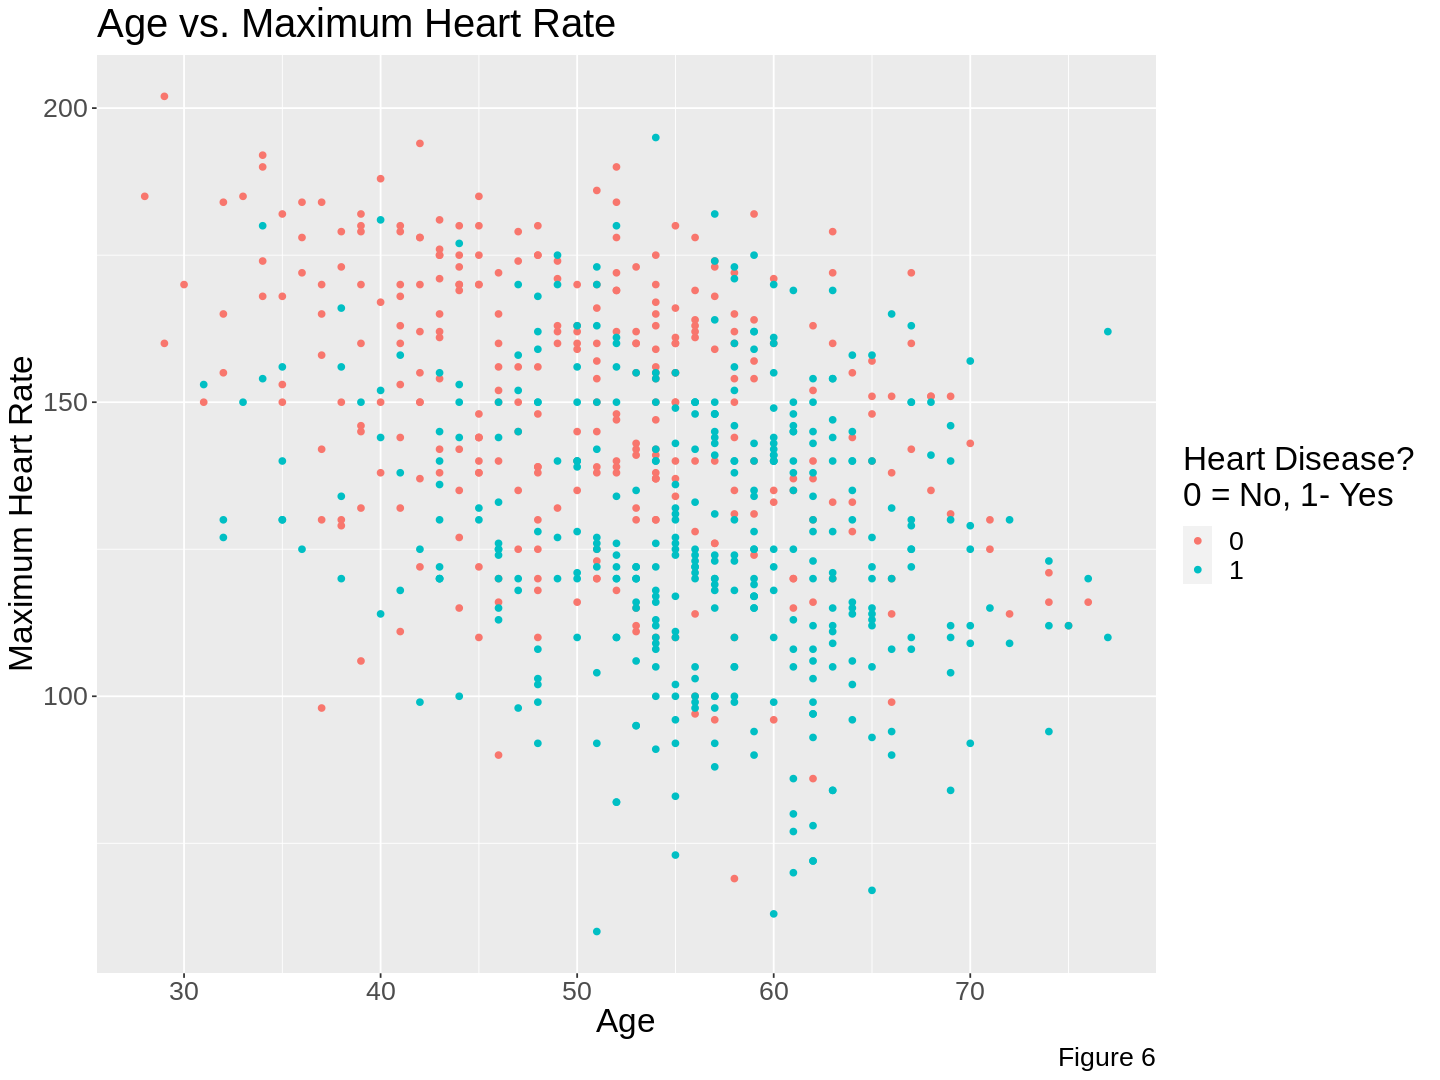

In [13]:
options(repr.plot.width = 12, repr.plot.height = 9)

max_hr_plot <- heart_train |>
ggplot(aes(x = age, y = max_hr, color = heart_disease)) +
geom_point()+
labs(x = "Age", y = "Maximum Heart Rate", color = "Heart Disease? 
0 = No, 1- Yes ", caption="Figure 6") +
ggtitle ("Age vs. Maximum Heart Rate")+
theme(text= element_text (size = 20))

max_hr_plot

### Age vs. Old Peak  ###

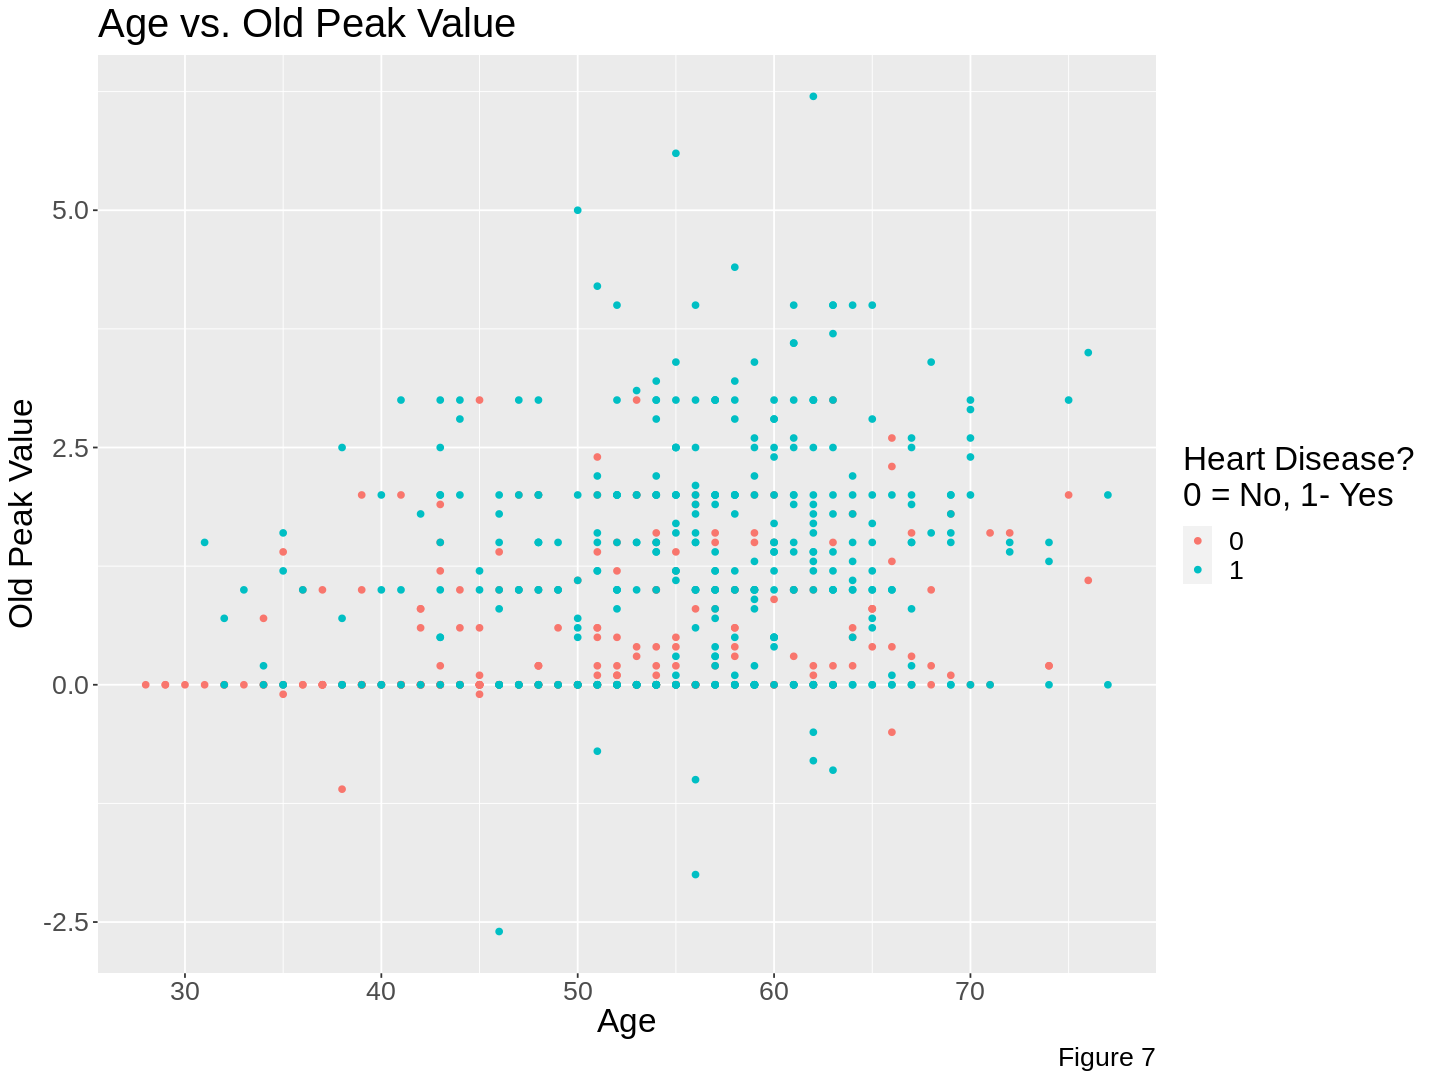

In [14]:
options(repr.plot.width = 12, repr.plot.height = 9)

max_hr_plot <- heart_train |>
ggplot(aes(x = age, y = old_peak, color = heart_disease)) +
geom_point()+
labs(x = "Age", y = "Old Peak Value", color = "Heart Disease? 
0 = No, 1- Yes ", caption="Figure 7")+
ggtitle ("Age vs. Old Peak Value")+
theme(text= element_text (size = 20))

max_hr_plot

## Creating the Recipe for the Model

We are using five predictors:

In [15]:
set.seed(999) 

heart_recipe <- recipe(heart_disease ~  resting_bp+ age  + cholesterol + max_hr +  old_peak, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())


heart_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

### Finding the Best K-value for Training Data ###

In [16]:
set.seed(999)

heart_vfold_train <- vfold_cv(heart_train, v= 5, strata = heart_disease)

k_vals <- tibble(neighbors=seq(from = 1, to = 40))

knn_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
                             set_engine("kknn") |>
                             set_mode("classification")

knn_results_train <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold_train, grid = k_vals) |>
       collect_metrics()        

k_value_train <- knn_results_train |> 
      select(.metric, mean,neighbors) |>
      filter(.metric == "accuracy") |>
      arrange(desc(mean)) |>
      slice(1) |>
      select(neighbors) |>
      pull()

k_value_train
                        

[1] 19

We got 19 as the best k-value.

### Accuracy for Choosing K = 19 for Training Data ###

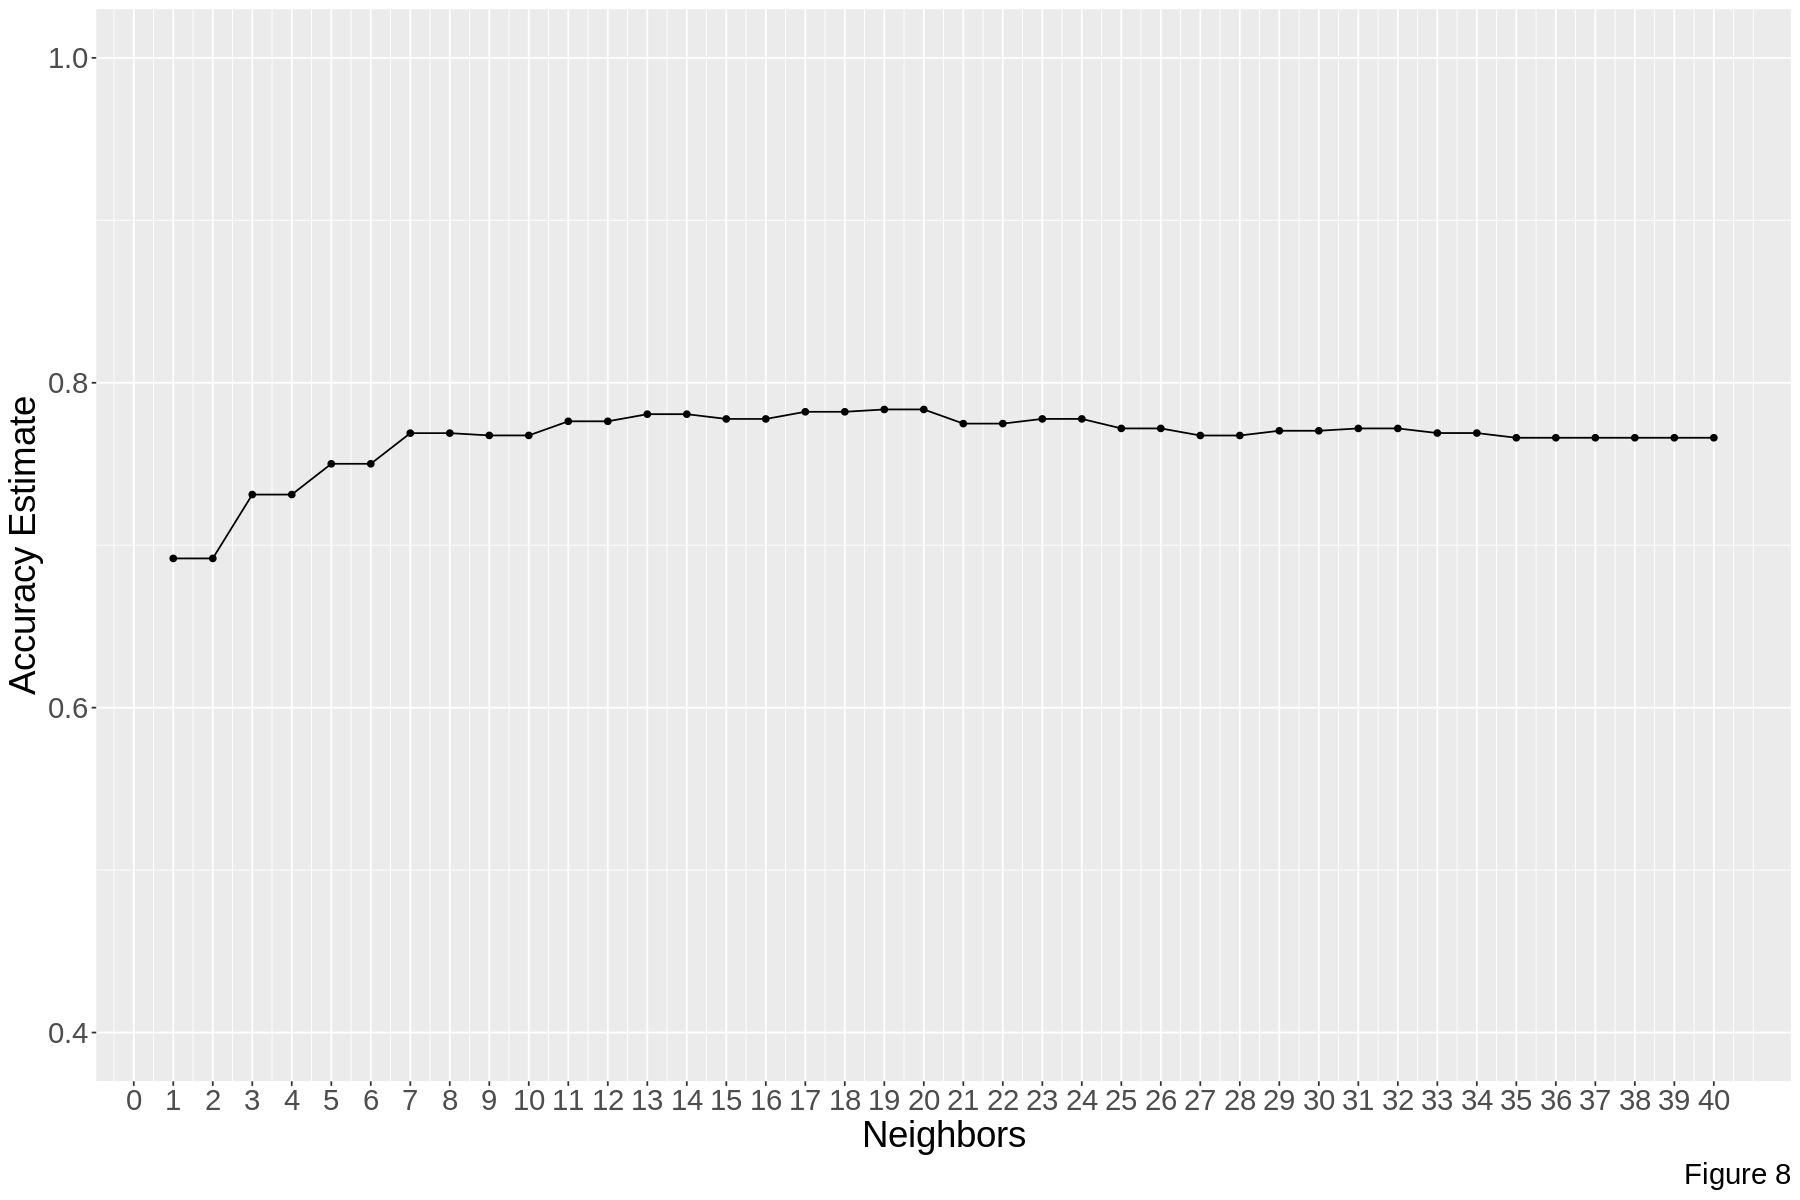

In [20]:
accuracies <- knn_results_train |> 
       filter(.metric == "accuracy")

options(repr.plot.width = 15, repr.plot.height = 10)

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", caption="Figure 8")+
       scale_x_continuous(breaks = seq(0, 40, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0)) +
       theme(text= element_text (size = 22))

accuracy_versus_k

We tried 40 K values and found out K=19 is the best.

Now, we are going to test on testing data set:

In [18]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = k_value_train) |>
                             set_engine("kknn") |>
                             set_mode("classification")

heart_data_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       fit(data = heart_train)

heart_predictions <- predict(heart_data_fit, heart_test) |>
       bind_cols(heart_test)

heart_metrics <- heart_predictions |>
         metrics(truth = heart_disease, estimate = .pred_class) 
heart_conf_mat <- heart_predictions |> 
       conf_mat(truth = heart_disease, estimate = .pred_class)

head(heart_predictions)
heart_metrics

.pred_class,age,sex,resting_bp,cholesterol,fasting_bs,max_hr,old_peak,heart_disease
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
0,40,M,140,289,0,172,0.0,0
0,49,F,160,180,0,156,1.0,1
0,54,M,150,195,0,122,0.0,0
1,37,M,140,207,0,130,1.5,1
0,43,F,120,201,0,165,0.0,0
0,36,M,120,267,0,160,3.0,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7652174
kap,binary,0.5243930


Table 2.3: Accuracy of K=19

In [19]:
heart_conf_mat

          Truth
Prediction   0   1
         0  75  26
         1  28 101

So, we got an accuracy level at 76.52% with k=19.

We wrongly estimated 26 people who actually have heart disease, but we predicted they were not, and we wrongly predicted 28 people who actually had no disease, but we predicted they had.


## 3. Discussion

#### Summarize what we found:

Initially, we glanced at the whole data set and cleaned and wrangled. We renamed the column names to enable readers easily understand each variable's meaning. Then, we removed the columns with unrelated information and selected the columns we needed for the visualizations. We mutated our class variable into a factor and let 1 means "Yes, the person has heart disease" and 0 means "No, the person does not have heart disease." Moreover, there are significantly more observations of males in the dataset than of females. This might affect our predictions, as the trends found amongst males will dominate. To prevent this happen, we balanced the data to make them into similar portions.

When we were doing research for the proposal, we found three factors which will influence heart functions to a large extent, so we chose three significant variables to be plotted at first: age, resting blood pressure and cholesterol level. They are used for our classification model to predict whether a patient will have heart disease. Nevertheless, after constructing the model, we noticed that more variables were needed. Then, we used forward selection and added more variables to achieve our prediction goal.

For the plotting part, we used histograms to show the portion of people who have heart disease or not for the target variable. For example, we can easily see that when people get older, they are more likely to have heart disease. Then, we also included scattering plots to demonstrate possible linear relationships between each variable we chose.

After our data visualization and analysis, we found that using five variables was the best choice to predict whether a heart disease will occur in specific individuals. The five variables are age, resting blood pressure, cholesterol level, maximum heart rate, and the old peak value. Based on a 5-fold cross-validation, we got an accuracy of 76.52%. 

We tried using 40 different K values for the model we created with 5-fold cross-validation. The highest estimated prediction accuracy was when K = 19 (accuracy of 76.25%), which means this model is ready to predict. Then we looked at the incorrect predictions we made in the best model, showing that we wrongly estimated 26 people who actually have heart disease, but we predicted they were not, and we wrongly predicted 28 people who actually had no disease, but we predicted they had.

Overall, to predict whether an individual will have heart disease, a classification model using age, resting blood pressure, cholesterol level, maximum heart rate, and the old peak value, and a K value of 19 would be the optimal choice.

#### Discuss whether this is what we expected to find

Among all the model formulas forward selection gave us, containing age, resting blood pressure, cholesterol level, maximum heart rate, and the old peak value, which had the highest accuracy at 78%. Before we ran forward selection, we expected the result could be predicted by age, resting blood pressure, and cholesterol level only. Unfortunately, it is not enough to make a valuable prediction (we only got accuracy around 68%). Our detailed result with data visualization compared to our expected outcome is discussed below.

When we look at the visualization of age and heart disease, we can easily find out that people over 50 are much more likely to have heart disease than younger people (Figure 1). This follows what we expected that the heart deteriorates and fatigues as people turn older (Lakatta et al., 2003). Secondly, when we compare age and resting blood pressure (Figure 2), we observed a negative correlation between the two variables: older people are likely to have lower resting BP. As we mentioned previously, lower resting BP might cause an increase in the likelihood of heart disease (Cleveland Clinic, 2022). Thus, this variable also matches what we expected.

Furthermore, when we were interpreting the relationship between cholesterol levels and heart disease (Figure 4), we met some difficulties at first since we could hardly see the relationship between the two variables as there is a large number of counts at 0 cholesterol level. However, luckily, when we tried to clean the outliers, which means removing the counts at 0 (which show a higher count of heart disease than no heart disease), a clearer pattern emerged (Figure 5). We can see that between 150 -350 mm/dl cholesterol, the count for heart disease is significantly more than no heart disease, indicating that this range of cholesterol levels is more commonly seen in patients with heart disease. As this is quite a high range, we can assume that higher cholesterol is correlated with a higher likelihood of heart disease. So, it followed as we predicted before. Thirdly, as Figure 6 shows, when we focus on the relationship between age and maximum heart rate, we find a negative correlation between them. If we look carefully, it can be seen that blue dots overlapped more on the right side of the graph and red dots overlapped scatter on the left side. This shows that when people get older, their maximum heart rate decreases, and it is more probably to have heart disease. This follows what we have researched: the maximum heart rate should be using 220 deducting the age which precisely presented in the graph; as age increases, the maximum rate decreases (Sandvik et al., 1995). 

Last but not least, when we were interpenetrating figure 7, which demonstrates the relationship between age and the old peak value (ST depression induced by exercise relative to rest), we could observe the blue dots (people who have heart disease) are gathered at the top shows people who have heart diseases are having higher value of the ST depression, this indicates their J points (a measurement for cardiac function) are more below the normal baseline on the electrocardiograph (Harrand, 2019). This is equivalent to our assumption at the beginning.

#### Discuss what impact could such findings have

After predicting from our model, we are expected to find that people with higher age, cholesterol level, blood pressure, maximum heart rate, and old peak value are more likely to have heart diseases.

Doctors can use this to keep an eye on patients as they grow older, offering advice to patients to keep their cholesterol levels low and exercise frequently. It can also be used to encourage people to visit the hospital more often as they grow older to identify heart problems at an earlier stage. These findings also have an impact on the diagnosis process of heart disease risk. Scientists can use Cholesterol levels, Resting Blood Pressure and Maximum Heart rate to do preliminary tests while identifying heart disease risk instead of only relying on complex and expensive medical tests such as an Electrocardiogram (ECG). 

Additionally, as factors like cholesterol, blood pressure and heart rate can easily be measured at home, medical organizations can give patients devices that track these levels periodically, and patients can use these to keep an eye on their health. These can be used as precautionary devices, advising patients to visit hospitals when any of these levels are very high and y give reminders or warnings when necessary. This would ensure that the public is aware of their standard of health and would relieve some of the workloads on hospitals.

#### Discuss what future questions could this lead to

Our findings can prompt multiple other questions that could significantly impact public health, medical research and the population of individuals impacted by heart disease. For example, does the increasing age causes an inevitable incline in heart disease risks? Is there a way to help older people prevent heart disease or reduce the severity of the risk? How can early identification of heart disease risk help mitigate health concerns? How can we use the current technology to efficiently identify and predict heart disease risk and treat patients during their early stages?

We can also broaden our previous question to identify more variables that have a strong relationship with the likelihood of heart disease. This can be used to give more accurate predictions. Additionally, researchers can study these predictors and gain a more in-depth knowledge of the mechanisms and symptoms that occur in the body as the heart grows weaker or more constricted.

## 4. References:

- Fedesoriano. (2021, September). *Heart Failure Prediction Dataset.* Retrieved from https://www.kaggle.com/fedesoriano/heart-failure-prediction. 

- Harrand, R. (2019, March 4). *What causes heart disease? explaining the model.* Kaggle. Retrieved December 6, 2022, from https://www.kaggle.com/code/tentotheminus9/what-causes-heart-disease-explaining-the-model 

- Lakatta, E. G., & Levy, D. (2003). Arterial and cardiac aging: major shareholders in cardiovascular disease enterprises: Part II: the aging heart in health: links to heart disease. *Circulation,* 107(2), 346-354.

- *What is blood pressure?* Cleveland Clinic. (n.d.). Retrieved October 29, 2022, from https://my.clevelandclinic.org/health/diseases/17649-blood-pressure 

- Kinosian, B., Glick, H., & Garland, G. (1994). Cholesterol and coronary heart disease: predicting risks by levels and ratios. *Annals of internal medicine,* 121(9), 641-647.

- *Lipid panel.* Lipid Panel | Johns Hopkins Medicine. (2020, December 4). Retrieved October 29, 2022, from https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL 

- Mayo Foundation for Medical Education and Research. (2021, December 10). *Heart failure.* Mayo Clinic. Retrieved October 29, 2022, from https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142 

- MediLexicon International. (n.d.). *St depression on ECG: What it means and causes.* Medical News Today. Retrieved December 6, 2022, from https://www.medicalnewstoday.com/articles/st-depression-on-ecg 

- Sandvik, L., Erikssen, J., Ellestad, M., Erikssen, G., Thaulow, E., Mundal, R., &amp; Rodahl, K. (1995). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality. *Coronary Artery Disease, 6*(8), 667–680. https://doi.org/10.1097/00019501-199508000-00012 

- Understanding cholesterol levels and numbers. Cleveland Clinic. (n.d.). Retrieved December 5, 2022, from https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean 

- U.S. Department of Health and Human Services. (n.d.). *Heart health and aging.* National Institute on Aging. Retrieved October 29, 2022, from https://www.nia.nih.gov/health/heart-health-and-aging 

